In [1]:
#%matplotlib qt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.metrics import accuracy_score

# Load Data

In [2]:
arff_train0 = arff.loadarff("lymphoma_10fold_arff/dlbcl_pls_train2.arff")
arff_test0 = arff.loadarff("lymphoma_10fold_arff/dlbcl_pls_test2.arff")

In [3]:
# load data to pandas dataframe
df_train0 = pd.DataFrame(arff_train0[0])
df_test0 = pd.DataFrame(arff_test0[0])

# Data Preprocessing

In [4]:
# tidy up the microarray data
def preprocess(train, test):
    # rename class column title (last column) for consistency
    train.rename(columns={"'y'":"class"}, inplace=True)
    test.rename(columns={"'y'":"class"}, inplace=True)
    
    # rename class binary labels for convenience
    train['class'] = train['class'].map({b'2':"diffuse",
                                             b'1':"follicular"})
    test['class'] = test['class'].map({b'2':"diffuse",
                                             b'1':"follicular"})
    
    return train, test

In [5]:
df_train0, df_test0 = preprocess(df_train0, df_test0)

# Observe Microarray Data

In [6]:
print('training dataset shape:', df_train0.shape)
display(df_train0.head())

print('testing dataset shape:', df_test0.shape)
display(df_test0.head())

training dataset shape: (69, 31)


,V00594_s_at,X02152_at,HG1980-HT2023_at,HG417-HT417_s_at,L19686_rna1_at,L17131_rna1_at,M14328_s_at,M12529_at,M63138_at,X67951_at,...,X12447_at,M22382_at,S73591_at,X03689_s_at,X17567_s_at,X72755_at,S82297_at,D45248_at,M20471_at,class
0,16000.000000,16000.000000,13727.135861,12290.682516,16000.000000,15885.697314,16000.000000,16000.000000,15972.845869,11895.791105,...,16000.000000,6319.770279,8214.517143,13555.393053,16000.000000,1596.868774,16000.000000,13416.977647,11442.761354,diffuse
1,16000.000000,16000.000000,16000.000000,5334.721952,16000.000000,16000.000000,11433.682753,16000.000000,9510.267575,13189.982072,...,12379.715825,7302.751421,3549.595362,782.584334,13083.308408,1488.987573,2848.661691,8394.834193,16000.000000,diffuse
2,3148.910577,1552.538287,3341.481750,1931.826603,2807.609136,3048.722791,3525.922832,4288.799432,3582.921655,1835.577884,...,4583.830619,1369.320209,6475.183311,12559.715716,3079.474374,3361.878230,12032.847295,2163.465458,2085.930811,follicular
3,5310.230063,5363.214567,13721.973520,2312.085803,8279.081781,9148.318949,7520.624058,4843.364597,6456.584042,4922.956465,...,5689.213714,6602.971669,3060.688177,3280.483191,4862.694119,2115.205609,1515.801997,4350.477881,5670.288572,diffuse
4,16000.000000,2003.093180,7070.490610,3749.013607,12229.265543,16000.000000,11632.326078,8566.270764,5854.311742,7398.221861,...,8993.729433,7779.116570,9053.829674,4488.379473,6477.185090,2927.034554,3759.347896,5808.536974,6873.514878,diffuse


testing dataset shape: (8, 31)


,V00594_s_at,X02152_at,HG1980-HT2023_at,HG417-HT417_s_at,L19686_rna1_at,L17131_rna1_at,M14328_s_at,M12529_at,M63138_at,X67951_at,...,X12447_at,M22382_at,S73591_at,X03689_s_at,X17567_s_at,X72755_at,S82297_at,D45248_at,M20471_at,class
0,4107.325326,5009.422570,3951.012471,3947.534218,6830.643311,5308.891191,3664.253134,6522.607758,3979.192151,4330.078806,...,5173.942864,2395.656245,3582.848018,16000.000000,4563.830202,5830.058368,16000.000000,4427.151483,4369.001035,diffuse
1,12006.018700,16000.000000,16000.000000,8996.877752,16000.000000,16000.000000,16000.000000,11012.140339,9572.447795,13015.301871,...,14072.793664,14562.893855,6614.329229,6761.093022,10277.297516,16000.000000,6450.450655,14306.015726,11531.329122,diffuse
2,8234.799241,11424.026167,14816.256957,3116.076056,14903.986432,14874.340808,9795.549038,5323.401722,7617.810680,5822.779166,...,10028.825839,2096.858163,3765.789330,14374.783185,5958.664640,1067.091371,8937.919824,3737.406231,7909.725932,diffuse
3,16000.000000,8488.275629,7316.483791,7156.371079,8742.631622,7867.792790,8935.456445,14138.405219,8992.298886,8263.478235,...,8304.331507,5284.953119,5859.194944,16000.000000,4808.998734,9775.466598,16000.000000,6267.843203,7838.822634,diffuse
4,16000.000000,10701.122814,4928.506544,10000.931084,8451.543288,9284.602960,10327.215825,7815.758726,6882.218121,6187.808378,...,6802.248566,2954.484811,3413.679853,13252.842489,5011.314778,13701.225454,16000.000000,4641.490068,3888.791691,diffuse


# Observe Class Balance

In [7]:
# train data
df_train0['class'].value_counts()

diffuse       50
follicular    19
Name: class, dtype: int64

In [8]:
# test data
df_test0['class'].value_counts()

diffuse    8
Name: class, dtype: int64

# Dimensionality Reduction: Principle Component Analysis

In [6]:
# normalize values for each feature (column) in microarray table
def normalize(data_):
    data = data_.copy()
    
    # for each column
    for i in range(0, data.shape[1]):
        min_ = data[:,i].min()    # get min value in column
        max_ = data[:,i].max()   # get max value in column
        
        temp = (data[:,i] - min_) / (max_ - min_)   # normalize column values
        data[:,i] = temp
    
    return data

In [7]:
# calculate covariance
def covariance(col1, col2):
    avg1 = col1.mean()
    avg2 = col2.mean()
    
    cov = 0
    
    for i in range(len(col1)):
        cov = cov + ((col1[i] - avg1) * (col2[i] - avg2))
    
    cov = cov / (len(col1) - 1)
    
    return cov

In [8]:
# calculate covariance matrix
def covariance_matrix(data_):
    data = data_.copy()
    
    # number of features (columns) in microarray
    dim = data.shape[1]
    
    # initiate matrix
    cov_matrix = np.zeros((dim, dim))
    
    # create covariance matrix
    for i in range(dim):
        for j in range(dim):
            cov = covariance(data[:,i], data[:,j])
            
            cov_matrix[i,j] = cov
    
    return cov_matrix

In [9]:
# Principle Component Analysis: Dimensionality Reduction
def PCA(data_, N_components):
    data = data_.copy()
    
    # subtract mean of samples within each feature
    data = data - np.mean(data, axis=0)
    
    # covariance matrix
    cov_matrix = covariance_matrix(data)
    
    # calculate eigenvalues & eigen vectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)
    
    # sort eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigen_values = eigen_values[sorted_index]
    
    # sort eigenvectors in descending order
    sorted_eigen_vectors = eigen_vectors[:,sorted_index]
    
    # get the first N components
    # PCA 1 captures the most variance
    eigen_vector_subset = sorted_eigen_vectors[:, 0:N_components]
    
    # reduce microarray data to fit onto N components
    data_reduced = np.dot(eigen_vector_subset.transpose(), data.transpose()).transpose()
    
    return data_reduced, sorted_eigen_values, sorted_eigen_vectors

## Perform PCA

In [10]:
# separate data & class labels
train0 = df_train0.iloc[:,:-1].values
train0_class = df_train0.iloc[:,-1]

In [11]:
# normalize microarray data
train0 = normalize(train0)

In [50]:
train0_norm = pd.DataFrame(train0, columns=df_train0.columns[:-1])

In [51]:
train0_norm

,V00594_s_at,X02152_at,HG1980-HT2023_at,HG417-HT417_s_at,L19686_rna1_at,L17131_rna1_at,M14328_s_at,M12529_at,M63138_at,X67951_at,...,J03077_s_at,X12447_at,M22382_at,S73591_at,X03689_s_at,X17567_s_at,X72755_at,S82297_at,D45248_at,M20471_at
0,1.000000,1.000000,0.828061,0.752406,1.000000,0.991763,1.000000,1.000000,0.998112,0.718530,...,1.000000,1.000000,0.363660,0.455596,0.840345,1.000000,0.042301,1.000000,0.825777,0.672473
1,1.000000,1.000000,1.000000,0.288101,1.000000,1.000000,0.683400,1.000000,0.548810,0.807287,...,1.000000,0.709532,0.428277,0.129399,0.006165,0.794603,0.035128,0.110198,0.487037,1.000000
2,0.058685,0.019089,0.042403,0.060960,0.026697,0.066679,0.135126,0.158123,0.136720,0.028592,...,0.284656,0.084042,0.038237,0.333973,0.775318,0.090121,0.159661,0.731588,0.066735,0.000000
3,0.216997,0.277815,0.827671,0.086342,0.430369,0.506240,0.412093,0.197989,0.336507,0.240327,...,0.276247,0.172731,0.382276,0.095212,0.169300,0.215698,0.076766,0.020018,0.214247,0.257607
4,1.000000,0.049680,0.324496,0.182256,0.721804,1.000000,0.697173,0.465615,0.294635,0.410083,...,0.725839,0.437863,0.459592,0.514286,0.248187,0.329392,0.130747,0.171814,0.312593,0.344082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.240662,1.000000,0.490320,0.677269,0.814236,0.883053,1.000000,0.576657,0.506243,0.934930,...,1.000000,0.617032,0.446417,0.139160,1.000000,0.511668,0.226505,0.857271,0.370725,0.340804
65,1.000000,1.000000,0.644755,0.924399,0.809545,0.903125,1.000000,1.000000,0.825258,0.676587,...,1.000000,0.871578,0.576143,1.000000,1.000000,0.522563,0.429727,1.000000,0.455178,0.426704
66,1.000000,0.420539,0.145467,0.868719,0.526835,0.657603,0.385620,0.724813,0.861512,0.363158,...,1.000000,0.459799,0.442317,0.253785,1.000000,0.345766,0.430853,0.980343,0.225343,0.266746
67,0.586467,0.759147,0.973194,0.425172,0.830787,0.315155,0.282486,0.152595,0.200936,0.403594,...,0.407359,0.535144,0.194889,0.107092,0.498513,0.705148,0.000000,0.752669,0.301267,0.491578


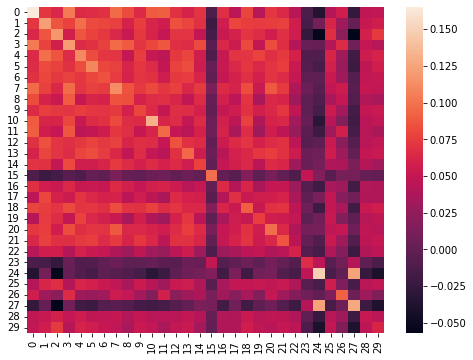

In [15]:
# observe covariance matrix
cov_matrix = covariance_matrix(train0)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cov_matrix, annot=False, ax=ax)

plt.show()

In [12]:
# PCA: 2 components
data_PCA2, eigenvalues, eigenvectors = PCA(train0, 2)

df_PCA2 = pd.DataFrame(data_PCA2, columns=['PC1','PC2'])
df_PCA2 = pd.concat([df_PCA2, train0_class], axis=1)

# observe sorted eigenvalues
print('eigenvalues:\n', eigenvalues)

# observe reduced data
df_PCA2

eigenvalues:
 [1.58734546 0.33517337 0.23352505 0.13771123 0.09838634 0.05696695
 0.04681292 0.04334209 0.03438136 0.03067583 0.02502512 0.0243667
 0.02145534 0.0204136  0.01956306 0.01787193 0.01607407 0.01286363
 0.0117904  0.00922551 0.00801145 0.00672167 0.00616826 0.00536429
 0.00413827 0.00357632 0.00323753 0.00281967 0.00267843 0.00221911]


,PC1,PC2,class
0,2.138723,-0.327405,diffuse
1,1.682994,0.990256,diffuse
2,-1.903203,0.044920,follicular
3,-0.767122,1.131461,diffuse
4,0.264659,0.591953,diffuse
...,...,...,...
64,0.991231,-0.270941,diffuse
65,1.453373,-0.624513,diffuse
66,0.486517,-0.447785,diffuse
67,0.068312,0.451331,diffuse


In [52]:
def scatter(df_, f0, f1, labelpad=0, title=''):
    df = df_.copy()
    
    # separate samples by class label
    class0 = df[df['class'] == 'follicular']
    class1 = df[df['class'] == 'diffuse']
    
    plt.scatter(class0[f0], class0[f1], color='deeppink', alpha=0.7, s=50)
    plt.scatter(class1[f0], class1[f1], color='deepskyblue', alpha=0.7, s=50)
    
    plt.xlabel(f0, labelpad=labelpad)
    plt.ylabel(f1, labelpad=labelpad, rotation='horizontal')
    plt.legend(['follicular', 'diffuse'])
    plt.title('Microarray (2 PC):\nOriginal Training Data w/ Assigned Labels')
    
    plt.savefig('aa.png')

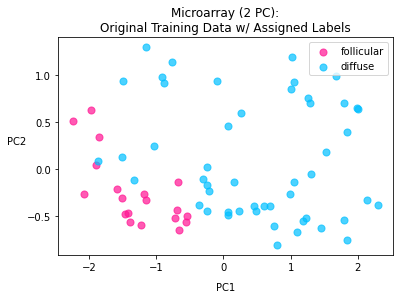

In [53]:
# observe samples in reduced dimension
scatter(df_PCA2, 'PC1', 'PC2', 10)
plt.show()

##### data_PCA3, eigenvalues_PCA3, eignvectors_PCA3 = PCA(train0, 3)

df_PCA3 = pd.DataFrame(data_PCA3, columns=['PC1','PC2', 'PC3'])
df_PCA3 = pd.concat([df_PCA3, train0_class], axis=1)

df_PCA3

In [20]:
c1 = df_PCA3[df_PCA3['class'] == 'follicular']
c2 = df_PCA3[df_PCA3['class'] == 'diffuse']

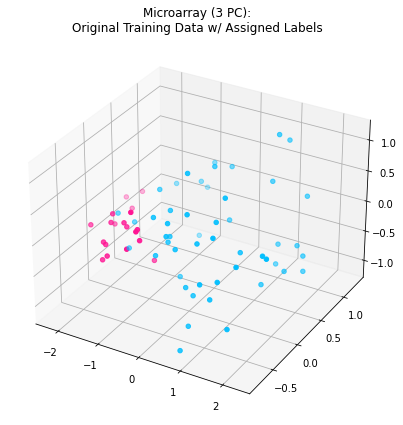

In [82]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(c1['PC1'], c1['PC2'], c1['PC3'], color = "deeppink")
ax.scatter3D(c2['PC1'], c2['PC2'], c2['PC3'], color = "deepskyblue")
plt.title('Microarray (3 PC):\nOriginal Training Data w/ Assigned Labels')

#plt.savefig('b.png')
plt.show()

# K-Means Clustering

In [22]:
class KMeans:
    
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
        # initialize dictionary to keep track of centroid class for each sample
        # will use this to compare labeled vs predicted class later
        self.samples_class = {}
        
        # initialize centroid list
        self.centroids = {}
        
        # initialize k random points to be centroids 
        #for i in range(self.k):
        #    rand_index = np.random.randint(0, data.shape[0]+1)
        #    self.centroids[i] = data[rand_index]

        for i in range(self.k):
            self.centroids[i] = np.random.uniform(-2,2,[1,2])
        
        # run k-means
        for i in range(self.max_iter):
            # dictionary that holds samples based on their associated cluster
            self.classifications = {}
            
            # create dictionary for k classes; each class (key) contains a list (value) that holds samples belonging to that class
            for class_ in range(self.k):
                self.classifications[class_] = []
            
            # determine centroid class for each sample in data
            for sample in range(len(data)):
                # calculate distance between k centroids and current sample
                distances = [np.linalg.norm(data[sample] - self.centroids[centroid]) for centroid in self.centroids]
                
                # find closest centroid and label sample
                class_ = distances.index(min(distances))
                self.classifications[class_].append(data[sample])
                self.samples_class[sample] = class_
            
            prev_centroids = dict(self.centroids)
            
            # update centroids
            for class_ in self.classifications:
                self.centroids[class_] = np.average(self.classifications[class_], axis=0)
                
            '''# check if k-means requires further iteration
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100) > self.tol:
                    optimized = False
            
            if optimized:
                # reformat for later use
                self.samples_class = np.array(list(self.samples_class.values()))
                
                print(f'K-means optimized after {i} iterations')
                break'''
        self.samples_class = np.array(list(self.samples_class.values()))
    
    def test(self, test_data):
        self.test_samples_class = {}
        
        self.test_classifications = {}
        for class_ in range(self.k):
            self.test_classifications[class_] = []
        
        for sample in range(len(test_data)):
            distances = [np.linalg.norm(test_data[sample] - self.centroids[centroid]) for centroid in self.centroids]
            
            # find closest centroid and label sample
            class_ = distances.index(min(distances))
            self.test_classifications[class_].append(test_data[sample])
            self.test_samples_class[sample] = class_
        
        self.test_samples_class = np.array(list(self.test_samples_class.values()))
        
        return self.test_samples_class

In [30]:
# run K-means on reduced data
model = KMeans()
model.fit(data_PCA2)

## Observe K-Means Clusters

In [31]:
# get centroids
centroids = model.centroids
print(centroids)

{0: array([-1.07101598,  0.01196153]), 1: array([ 1.10251645, -0.01231334])}


In [32]:
# get samples for each cluster
cluster0 = model.classifications[0]
cluster1 = model.classifications[1]

print(f'cluster0: {len(cluster0)} samples\ncluster1: {len(cluster1)} samples')

cluster0: 35 samples
cluster1: 34 samples


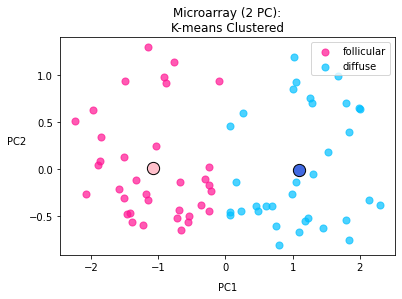

In [88]:
# plot samples grouped with their cluster
plt.scatter([x[0] for x in cluster0], [y[1] for y in cluster0], color='deeppink', alpha=0.7, s=50)
plt.scatter([x[0] for x in cluster1], [y[1] for y in cluster1], color='deepskyblue', alpha=0.7, s=50)

plt.scatter(centroids[0][0], centroids[0][1], color='pink', edgecolors='black', s=150)
plt.scatter(centroids[1][0], centroids[1][1], color='royalblue', edgecolors='black', s=150)

plt.xlabel('PC1', labelpad=10)
plt.ylabel('PC2', rotation='horizontal', labelpad=12)
plt.legend(['follicular', 'diffuse'])
plt.title('Microarray (2 PC):\nK-means Clustered')

#plt.savefig('c.png')
plt.show()

## Assess Model Accuracy Using Training Data Labels

In [34]:
# reformat categorical labels to binary for accuracy comparison
def reformat_labels(data_):
    data = data_.copy()
    
    df = pd.DataFrame(data_)
    df['class'] = df['class'].map({'follicular':0,
                                   'diffuse':1})
    
    return df

In [35]:
# get training data & predicted labels
train_labels = reformat_labels(train0_class)
predicted_train_labels = model.samples_class

In [36]:
# accuracy score on training data
print(f'training data accuracy: {accuracy_score(train_labels, predicted_train_labels) * 100:.2f}%')

training data accuracy: 76.81%


## Test Model On Unseen Microarray Samples

In [37]:
# prepare test set
test0 = df_test0.iloc[:,:-1].values
test0_class = df_test0.iloc[:,-1]

# normalize
test0 = normalize(test0)

# PCA
test_data_PCA2, test_eigenvalues, test_eigenvectors = PCA(test0, 2)

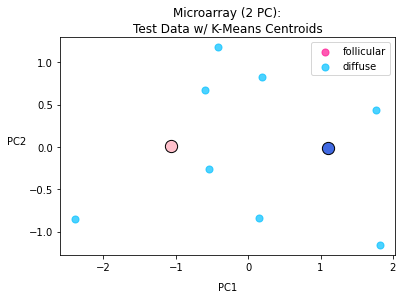

In [89]:
# observe test data with predicted centroids
df_test_PCA2 = pd.DataFrame(test_data_PCA2, columns=['PC1', 'PC2'])
df_test_PCA2['class'] = test0_class

scatter(df_test_PCA2, 'PC1', 'PC2')

plt.scatter(centroids[0][0], centroids[0][1], color='pink', edgecolors='black', s=150)
plt.scatter(centroids[1][0], centroids[1][1], color='royalblue', edgecolors='black', s=150)

plt.xlabel('PC1', labelpad=10)
plt.ylabel('PC2', rotation='horizontal', labelpad=12)
plt.legend(['follicular', 'diffuse'])
plt.title('Microarray (2 PC):\nTest Data w/ K-Means Centroids')

#plt.savefig('d.png')
plt.show()

In [39]:
# use model to predict on test set
predicted_test_labels = model.test(test_data_PCA2)

In [40]:
# get training data & predicted labels
test_labels = reformat_labels(test0_class)

In [41]:
# accuracy score on test data
print(f'test data accuracy: {accuracy_score(test_labels, predicted_test_labels) * 100:.2f}%')

test data accuracy: 50.00%


# Improve K-Means Model By Removing Outliers

In [42]:
# original microarray training data
df_PCA2

,PC1,PC2,class
0,2.138723,-0.327405,diffuse
1,1.682994,0.990256,diffuse
2,-1.903203,0.044920,follicular
3,-0.767122,1.131461,diffuse
4,0.264659,0.591953,diffuse
...,...,...,...
64,0.991231,-0.270941,diffuse
65,1.453373,-0.624513,diffuse
66,0.486517,-0.447785,diffuse
67,0.068312,0.451331,diffuse


In [43]:
# separate samples by class
class0 = df_PCA2[df_PCA2['class'] == 'follicular'].iloc[:,:-1].values
class1 = df_PCA2[df_PCA2['class'] == 'diffuse'].iloc[:,:-1].values

In [44]:
# calculate centroids based on given training labels
centroid0 = np.average(class0, axis=0)
centroid1 = np.average(class1, axis=0)

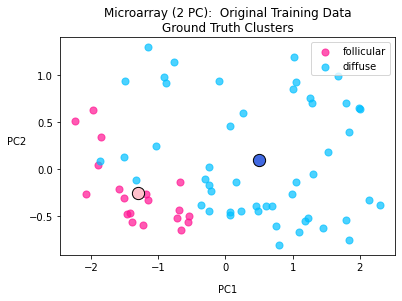

In [45]:
# plot original training data
plt.scatter(class0[:,0], class0[:,1], color='deeppink', alpha=0.7, s=50)
plt.scatter(class1[:,0], class1[:,1], color='deepskyblue', alpha=0.7, s=50)

# centroids shown are determined based on training labels
plt.scatter(centroid0[0], centroid0[1], color='pink', edgecolors='black', s=150)
plt.scatter(centroid1[0], centroid1[1], color='royalblue', edgecolors='black', s=150)

plt.xlabel('PC1', labelpad=12)
plt.ylabel('PC2', rotation='horizontal', labelpad=12)
plt.legend(['follicular', 'diffuse'])
plt.title('Microarray (2 PC):  Original Training Data\nGround Truth Clusters')

plt.show()

In [46]:
def median_absolute_deviation(data, median, scaling_factor=1.4826):
    
    # subtract median from all samples
    diff = data - median
    
    # get absolute values
    diff = np.absolute(diff)
    
    # find median of abs(diff)
    mad = np.median(diff) * scaling_factor
    
    return mad

In [47]:
# remove outliers in training data
# use Median Absolute Deviation
def remove_outliers(df_PCA, deviations=3):
    data = df_PCA.copy()
    
    # holds outliers
    outliers = []
    
    # holds distance from sample to centroid for each class
    samples_dist0 = {}
    samples_dist1 = {}
    
    # group samples by class
    df_class0 = data[data['class'] == 'follicular']
    df_class1 = data[data['class'] == 'diffuse']
    
    # calculate centroids
    centroid0 = np.average(df_class0.iloc[:,:-1].values, axis=0)
    centroid1 = np.average(df_class1.iloc[:,:-1].values, axis=0)
    
    # calculate distances from sample to respective centroid
    for i in range(len(df_class0)):
        dist = np.linalg.norm(df_class0.iloc[i,:-1].values - centroid0)
        samples_dist0[df_class0.index[i]] = dist
    
    for i in range(len(df_class1)):
        dist = np.linalg.norm(df_class1.iloc[i,:-1].values - centroid1)
        samples_dist1[df_class1.index[i]] = dist
    
    # get median distance for each cluster
    median0 = np.median(list(samples_dist0.values()))
    median1 = np.median(list(samples_dist1.values()))
    
    # get median-absolute-deviation for each cluster
    mad0 = median_absolute_deviation(list(samples_dist0.values()), median0, 1)
    mad1 = median_absolute_deviation(list(samples_dist1.values()), median1, 1)
    
    # identify outliers (samples' centroid distances that is greater than 3 median-absolute-deviations)
    for i in samples_dist0:
        if samples_dist0[i] < (median0 - (deviations * mad0)) or samples_dist0[i] > (median0 + (deviations * mad0)):
            outliers.append(i)
    
    for i in samples_dist1:
        if samples_dist1[i] < (median1 - (deviations * mad1)) or samples_dist1[i] > (median1 + (deviations * mad1)):
            outliers.append(i)
    
    # remove outliers
    new_data = data.drop(outliers)
    
    return new_data, (median0, mad0), (median1, mad1), outliers

In [48]:
df_no_outliers, (median0, mad0), (median1, mad1), outliers = remove_outliers(df_PCA2, deviations=3)

In [49]:
outliers

[20, 53]

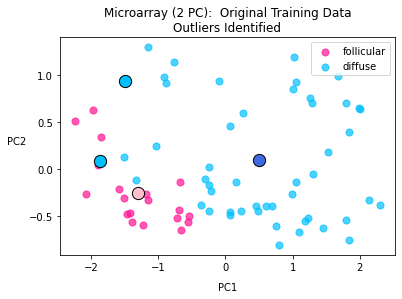

In [91]:
# observe outliers
plt.scatter(class0[:,0], class0[:,1], color='deeppink', alpha=0.7, s=50)
plt.scatter(class1[:,0], class1[:,1], color='deepskyblue', alpha=0.7, s=50)

plt.scatter(centroid0[0], centroid0[1], color='pink', edgecolors='black', s=150)
plt.scatter(centroid1[0], centroid1[1], color='royalblue', edgecolors='black', s=150)

# plot outliers
plt.scatter(df_PCA2.loc[20][:2].values[0], df_PCA2.loc[20][:2].values[1], color='deepskyblue', edgecolors='black', alpha=1, s=150)
plt.scatter(df_PCA2.loc[53][:2].values[0], df_PCA2.loc[53][:2].values[1], color='deepskyblue', edgecolors='black', alpha=1, s=150)

plt.xlabel('PC1', labelpad=10)
plt.ylabel('PC2', rotation='horizontal', labelpad=12)
plt.legend(['follicular', 'diffuse'])
plt.title('Microarray (2 PC):  Original Training Data\nOutliers Identified')

plt.savefig('e.png')
plt.show()

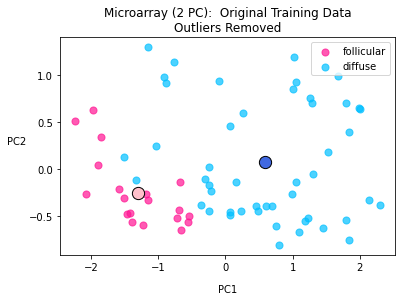

In [51]:
### observe training data (no outliers)
class0_out = df_no_outliers[df_no_outliers['class'] == 'follicular'].iloc[:,:-1].values
class1_out = df_no_outliers[df_no_outliers['class'] == 'diffuse'].iloc[:,:-1].values

# get centroids based on training labels
centroid0_out = np.average(class0_out, axis=0)
centroid1_out = np.average(class1_out, axis=0)

plt.scatter(class0_out[:,0], class0_out[:,1], color='deeppink', alpha=0.7, s=50)
plt.scatter(class1_out[:,0], class1_out[:,1], color='deepskyblue', alpha=0.7, s=50)

plt.scatter(centroid0_out[0], centroid0_out[1], color='pink', edgecolors='black', s=150)
plt.scatter(centroid1_out[0], centroid1_out[1], color='royalblue', edgecolors='black', s=150)

plt.xlabel('PC1', labelpad=12)
plt.ylabel('PC2', rotation='horizontal', labelpad=12)
plt.legend(['follicular', 'diffuse'])
plt.title('Microarray (2 PC):  Original Training Data\nOutliers Removed')

plt.show()

## Observe K-Means Performance Using Training Data Without Outliers

In [52]:
# drop outliers from class labels
train_labels_out = train_labels.drop(outliers)

In [53]:
model2 = KMeans()
model2.fit(df_no_outliers.iloc[:,:-1].values)

In [54]:
# accuracy score on training data (no outliers)
predicted_train_labels_out = model2.samples_class
print(f'training data accuracy: {accuracy_score(train_labels_out, predicted_train_labels_out) * 100:.2f}%')

training data accuracy: 79.10%


In [55]:
# get centroids
centroids_out = model2.centroids
print(centroids_out)

{0: array([-1.03388285, -0.01820366]), 1: array([ 1.10251645, -0.01231334])}


In [56]:
# get samples for each cluster
cluster0_out = model2.classifications[0]
cluster1_out = model2.classifications[1]

print(f'cluster0: {len(cluster0_out)} samples\ncluster1: {len(cluster1_out)} samples')

cluster0: 33 samples
cluster1: 34 samples


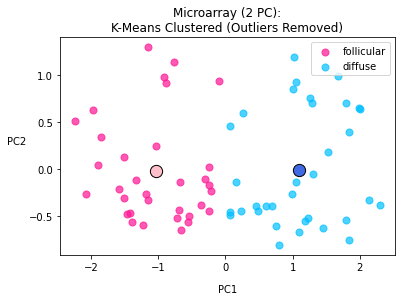

In [57]:
# plot samples grouped with their cluster
plt.scatter([x[0] for x in cluster0_out], [y[1] for y in cluster0_out], color='deeppink', alpha=0.7, s=50)
plt.scatter([x[0] for x in cluster1_out], [y[1] for y in cluster1_out], color='deepskyblue', alpha=0.7, s=50)

plt.scatter(centroids_out[0][0], centroids_out[0][1], color='pink', edgecolors='black', s=150)
plt.scatter(centroids_out[1][0], centroids_out[1][1], color='royalblue', edgecolors='black', s=150)

plt.xlabel('PC1', labelpad=12)
plt.ylabel('PC2', rotation='horizontal', labelpad=12)
plt.legend(['follicular', 'diffuse'])
plt.title('Microarray (2 PC):\nK-Means Clustered (Outliers Removed)')

plt.show()

## Test Model On Unseen Microarray Samples

In [58]:
# use model to predict on test set
predicted_test_labels_out = model2.test(test_data_PCA2)

In [59]:
# accuracy score on test data
print(f'test data accuracy: {accuracy_score(test_labels, predicted_test_labels_out) * 100:.2f}%')

test data accuracy: 50.00%


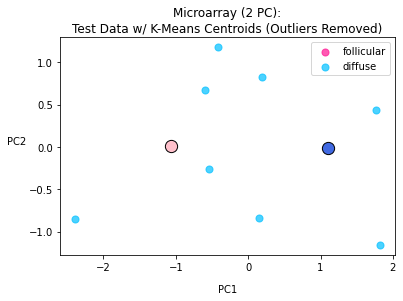

In [60]:
# observe test data with new centroids (outliers removed)
scatter(df_test_PCA2, 'PC1', 'PC2')

plt.scatter(centroids[0][0], centroids[0][1], color='pink', edgecolors='black', s=150)
plt.scatter(centroids[1][0], centroids[1][1], color='royalblue', edgecolors='black', s=150)

plt.xlabel('PC1', labelpad=12)
plt.ylabel('PC2', rotation='horizontal', labelpad=12)
plt.legend(['follicular', 'diffuse'])
plt.title('Microarray (2 PC):\nTest Data w/ K-Means Centroids (Outliers Removed)')

plt.show()

# Analyze Microarray With Other Algorithms

## SVM (Support Vector Machine)

In [61]:
from sklearn import svm

In [62]:
model3 =  svm.SVC()
model3.fit(df_no_outliers.iloc[:,:-1].values, train_labels_out.values.reshape(len(train_labels_out),))

SVC()

In [63]:
print(f'training data accuracy: {model3.score(df_no_outliers.iloc[:,:-1].values, train_labels_out) * 100:.2f}%')

training data accuracy: 95.52%


In [64]:
print(f'testing data accuracy: {model3.score(test_data_PCA2, test_labels) * 100:.2f}%')

testing data accuracy: 87.50%


# Misc.

In [67]:
# PCA: All 30 components
data30 = train0.copy()
data30 = data30 - np.mean(data30, axis=0)
cov_matrix30 = covariance_matrix(data30)
eigen_values30, eigen_vectors30 = np.linalg.eigh(cov_matrix30)

In [68]:
eigen_values30

array([0.00221911, 0.00267843, 0.00281967, 0.00323753, 0.00357632,
       0.00413827, 0.00536429, 0.00616826, 0.00672167, 0.00801145,
       0.00922551, 0.0117904 , 0.01286363, 0.01607407, 0.01787193,
       0.01956306, 0.0204136 , 0.02145534, 0.0243667 , 0.02502512,
       0.03067583, 0.03438136, 0.04334209, 0.04681292, 0.05696695,
       0.09838634, 0.13771123, 0.23352505, 0.33517337, 1.58734546])

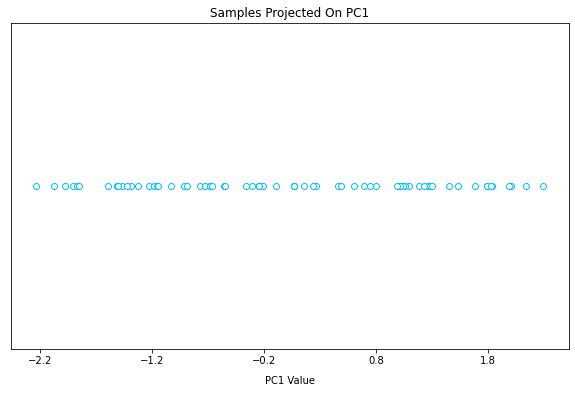

In [43]:
# observe PC1 variance
plt.figure(figsize=(10,6))
plt.scatter(df_PCA2['PC1'], np.zeros(len(train0)), color='deepskyblue', facecolor='white')

plt.xlabel('PC1 Value', labelpad=10)
plt.xticks(np.arange(-2.2,2.2))
plt.yticks([])
plt.title('Samples Projected On PC1')

plt.savefig('f')
plt.show()

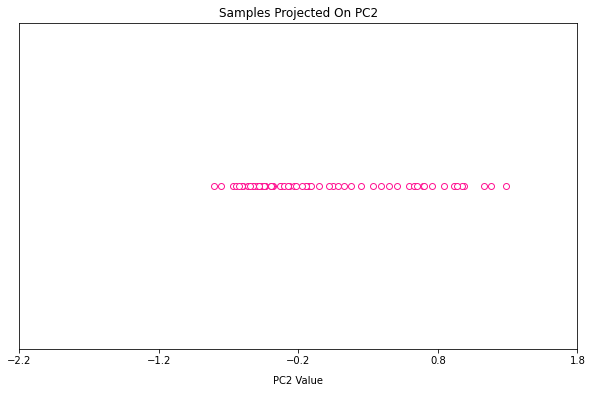

In [44]:
# observe PC2 variance
plt.figure(figsize=(10,6))
plt.scatter(df_PCA2['PC2'], np.zeros(len(train0)), color='deeppink', facecolor='white')

plt.xlabel('PC2 Value', labelpad=10)
plt.xticks(np.arange(-2.2,2.2))
plt.yticks([])
plt.title('Samples Projected On PC2')

plt.savefig('g')
plt.show()